# Influencia del pre-procesado de datos (variables numéricas)

In [ ]:
import pandas as pd

adult_census = pd.read_csv("../../data/adult-census-numeric/train.csv")

In [ ]:
# Eliminamos el target de los datos que utilizaremos para entrenar nuestro modelo predictivo.

target_name = "class"
target = adult_census[target_name]
data = adult_census.drop(columns=target_name)

In [ ]:
# Seleccionamos solo las columnas numéricas:

numerical_columns = ["age", "capital-gain", "capital-loss", "hours-per-week"]

data_numeric = data[numerical_columns]

In [ ]:
# Dividimos en entrenamiento y pruebas.

from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data_numeric, target, random_state=42)

## Modelo de ajuste con preprocesamiento
Hay una variedad de algoritmos de preprocesamiento en Scikit-Learn nos permite transformar los datos de entrada antes de entrenar un modelo.

| Nombre                      | Clase                           | Descripción | Enlace oficial |
|-----------------------------|--------------------------------|-------------|----------------|
| Escalado estándar           | `StandardScaler`               | Escala los datos para que tengan media 0 y desviación estándar 1. | [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) |
| Escalado min-max            | `MinMaxScaler`                 | Escala los datos dentro de un rango definido (por defecto, 0 a 1). | [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) |
| Normalización               | `Normalizer`                   | Convierte los datos para que tengan una norma unitaria (vector de longitud 1). | [Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html) |
| Binarización               | `Binarizer`                    | Convierte los valores en 0 o 1 según un umbral dado. | [Binarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html) |
| Transformación de Potencia  | `PowerTransformer`             | Aplica transformaciones como Box-Cox o Yeo-Johnson para hacer que los datos se parezcan más a una distribución normal. | [PowerTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html) |
| Transformación Quantile     | `QuantileTransformer`          | Transforma los datos para que sigan una distribución uniforme o normal. | [QuantileTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html) |
| Codificación One-Hot        | `OneHotEncoder`                | Convierte variables categóricas en variables binarias. | [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) |
| Codificación de etiquetas   | `LabelEncoder`                 | Convierte etiquetas categóricas en números enteros. | [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) |
| Imputación de valores faltantes | `SimpleImputer`          | Rellena los valores faltantes usando una estrategia como la media o la mediana. | [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) |
| Imputación avanzada         | `KNNImputer`                   | Rellena los valores faltantes basándose en los vecinos más cercanos. | [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) |
| Generación de polinomios    | `PolynomialFeatures`           | Genera combinaciones polinómicas de las características existentes. | [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) |
| Selección de características | `SelectKBest`                 | Selecciona las mejores características basándose en pruebas estadísticas. | [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) |

En nuestro caso, **estandarizaremos** los datos y luego entrenaremos un nuevo modelo de regresión logística.

In [ ]:
data_train.describe()

,age,capital-gain,capital-loss,hours-per-week
count,29304.000000,29304.000000,29304.000000,29304.000000
mean,38.656429,1111.276686,87.576952,40.449222
std,13.710118,7770.551486,403.319748,12.341353
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


Vemos que las características abarcan diferentes rangos.

Algunos algoritmos hacen algunos supuestos con respecto a las distribuciones de características y, por lo general, la normalización de las características será útil para abordar estos supuestos.

Algunas razones para escalar:

- Los modelos que se basan en la distancia entre un par de muestras, por ejemplo, los K-Nears Neighbours, deben ser entrenados en características normalizadas para que cada característica contribuya aproximadamente por igual a los cálculos de distancia.

- Muchos modelos como la regresión logística usan un solucionador numérico (basado en el descenso de gradiente) para encontrar sus parámetros óptimos.
    - Este solucionador converge más rápido cuando las características se escalan.

In [ ]:
# ajustamos la escala de los datos.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_train)

StandardScaler()

In [ ]:
from sklearn.preprocessing import  Normalizer

normalizer = Normalizer()
normalizer.fit(data_train)

Normalizer()

El método de ajuste para transformadores es similar al método de ajuste para predictores.
- La principal diferencia es que el primero tiene un solo argumento (la matriz de datos), mientras que el segundo tiene dos argumentos (la matriz de datos y el objetivo).

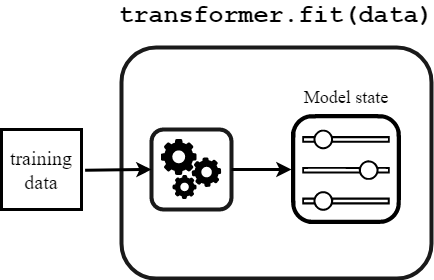

Diagrama de ajuste del transformador

En este caso, el algoritmo necesita calcular la desviación media y estándar para cada característica y almacenarlos en algunas matrices numpy.

Aquí, estas estadísticas son los estados del modelo.

In [ ]:
# Podemos inspeccionar las medias calculadas y las desviaciones estándar.

scaler.mean_

array([  38.65642916, 1111.27668578,   87.57695195,   40.44922195])

In [ ]:
scaler.scale_

array([  13.70988419, 7770.41889928,  403.31286627,   12.34114242])

In [ ]:
print(normalizer.feature_names_in_)

normalizer.get_feature_names_out()

['age' 'capital-gain' 'capital-loss' 'hours-per-week']


array(['age', 'capital-gain', 'capital-loss', 'hours-per-week'],
      dtype=object)

La escala de los datos se aplica a cada función individualmente (es decir, cada columna en la matriz de datos).

Para cada característica, restamos su media y división por su desviación estándar.

Una vez que hemos llamado al método de ajuste, podemos realizar la transformación de datos llamando a la transformación del método.

In [ ]:
data_train_scaled = scaler.transform(data_train)
data_train_scaled

array([[-0.55846053, -0.14301374, -0.21714396,  0.7738974 ],
       [-0.70434068, -0.14301374, -0.21714396, -0.03640035],
       [-0.3396403 , -0.14301374, -0.21714396, -0.03640035],
       ...,
       [-0.26670022, -0.14301374, -0.21714396, -0.84669811],
       [ 0.68152077, -0.14301374, -0.21714396, -0.03640035],
       [ 0.97328108, -0.14301374, -0.21714396, -0.03640035]])

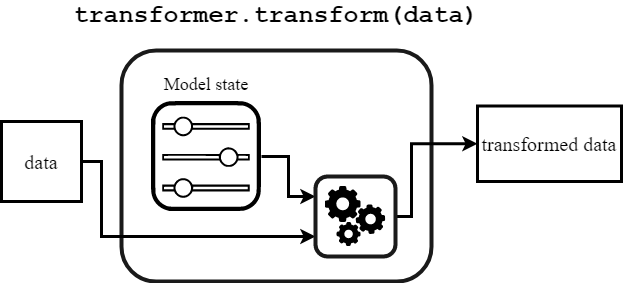

El método (de transformación) para transformadores es similar al método de predicción para predictores.

- Utiliza una función predefinida, llamada función de transformación y utiliza los estados del modelo y los datos de entrada.
- Sin embargo, en lugar de generar predicciones, el trabajo del método de transformación es generar una versión transformada de los datos de entrada.
- Finalmente, el método **`fit_transform`** es un método abreviado para llamar sucesivamente a `fit` y luego a `transform`.

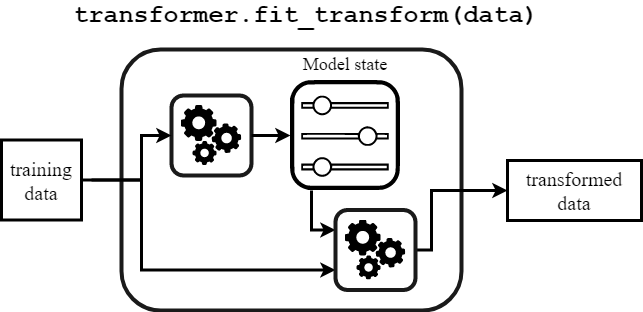

In [ ]:
data_train_scaled = scaler.fit_transform(data_train)
data_train_scaled


array([[-0.55846053, -0.14301374, -0.21714396,  0.7738974 ],
       [-0.70434068, -0.14301374, -0.21714396, -0.03640035],
       [-0.3396403 , -0.14301374, -0.21714396, -0.03640035],
       ...,
       [-0.26670022, -0.14301374, -0.21714396, -0.84669811],
       [ 0.68152077, -0.14301374, -0.21714396, -0.03640035],
       [ 0.97328108, -0.14301374, -0.21714396, -0.03640035]])

In [ ]:
data_train_scaled = pd.DataFrame(data_train_scaled,
                                 columns=data_train.columns)
data_train_scaled.head()

,age,capital-gain,capital-loss,hours-per-week
0,-0.558461,-0.143014,-0.217144,0.773897
1,-0.704341,-0.143014,-0.217144,-0.036400
2,-0.339640,-0.143014,-0.217144,-0.036400
3,-0.777281,-0.143014,-0.217144,-0.036400
4,0.316820,-0.143014,-0.217144,0.368749


In [ ]:
data_train_scaled.describe()

,age,capital-gain,capital-loss,hours-per-week
count,2.930400e+04,2.930400e+04,2.930400e+04,2.930400e+04
mean,9.504940e-17,3.152148e-17,-7.480291e-17,-1.202666e-16
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.579622e+00,-1.430137e-01,-2.171440e-01,-3.196562e+00
25%,-7.772808e-01,-1.430137e-01,-2.171440e-01,-3.640035e-02
50%,-1.208201e-01,-1.430137e-01,-2.171440e-01,-3.640035e-02
75%,6.815208e-01,-1.430137e-01,-2.171440e-01,3.687485e-01
max,3.745004e+00,1.272618e+01,1.058340e+01,4.744356e+00


Observar que la media de todas las columnas está cerca de 0 y la desviación estándar en todos los casos es cercana a 1.

También podemos visualizar el efecto de `StandardScaler` utilizando un conjunto de gráficos para mostrar tanto los histogramas de las distribuciones como un diagrama de dispersión de cualquier par de características numéricas.

Podemos observar que `StandardScaler` no cambia la estructura de los datos en sí, pero los ejes se cambian y escalan.

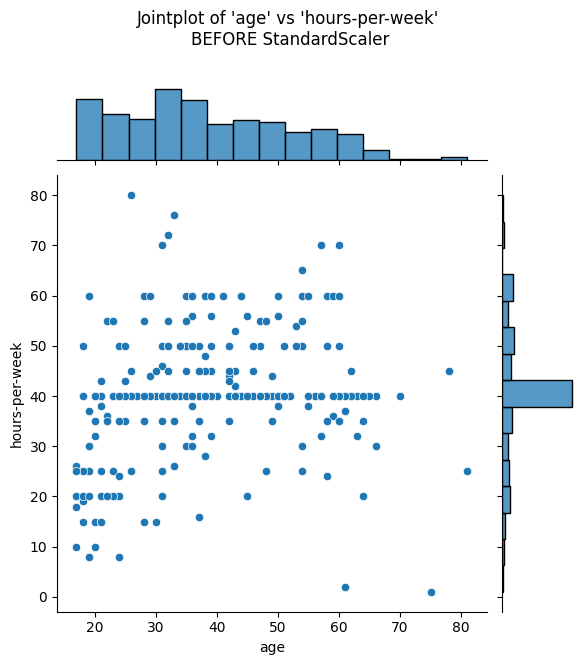

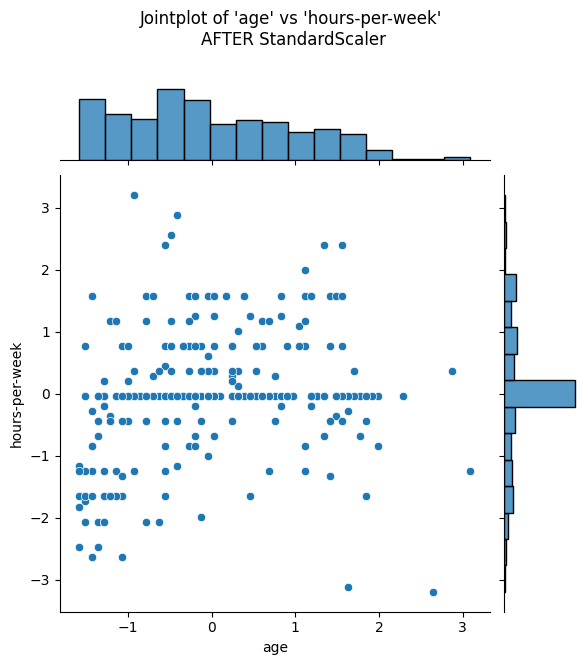

In [ ]:
import matplotlib.pyplot  as plt
import seaborn as sns

# Número de puntos para visualizar para tener una trama más clara
num_points_to_plot = 300

sns.jointplot(data=data_train[:num_points_to_plot], x="age",
              y="hours-per-week", marginal_kws=dict(bins=15))
plt.suptitle("Jointplot of 'age' vs 'hours-per-week' \nBEFORE StandardScaler", y=1.1)

sns.jointplot(data=data_train_scaled[:num_points_to_plot], x="age",
              y="hours-per-week", marginal_kws=dict(bins=15))

_ = plt.suptitle("Jointplot of 'age' vs 'hours-per-week' \nAFTER StandardScaler", y=1.1)

## Crear un pipeline

Podemos combinar fácilmente las operaciones secuenciales con un **[pipeline scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)**, que encadena las operaciones y se usa como cualquier otro clasificador o regresor.

La función auxiliar **[make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)** creará una pipeline: se necesita como argumentos las transformaciones sucesivas a realizar, seguidas por el modelo de clasificador o regresor.

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression())
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
model.named_steps

{'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression()}

In [ ]:
# Este pepiline predictiva expone los mismos métodos que el predictor final:
# fit y predict (y adicionalmente predict_proba, decision_function, o score).

start = time.time()
model.fit(data_train, target_train)
elapsed_time = time.time() - start

Podemos representar el mecanismo interno de una tubería al llamar al ajuste con el siguiente diagrama:

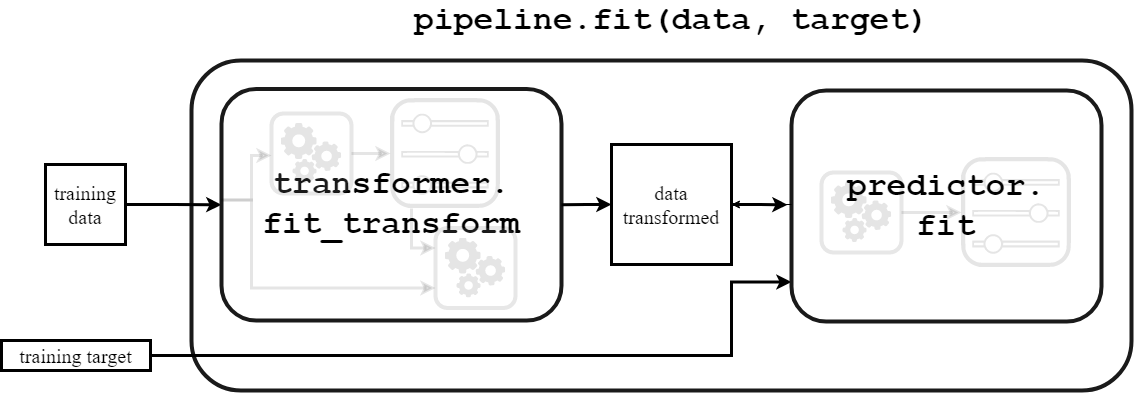

Al llamar a `model.fit`, el método `fit_transform` de cada uno transformer subyacente  (aquí un solo transformer) en el pipeline será invocado para:
- Aprender los estados del modelo interno
- Transformar los datos de entrenamiento.

Finalmente, los datos preprocesados ​​se proporcionan para entrenar al predictor.

In [ ]:
# Para predecir los objetivos dado un conjunto de pruebas, se usa el método predict.

predicted_target = model.predict(data_test)
predicted_target[:5]

array([' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K'], dtype=object)

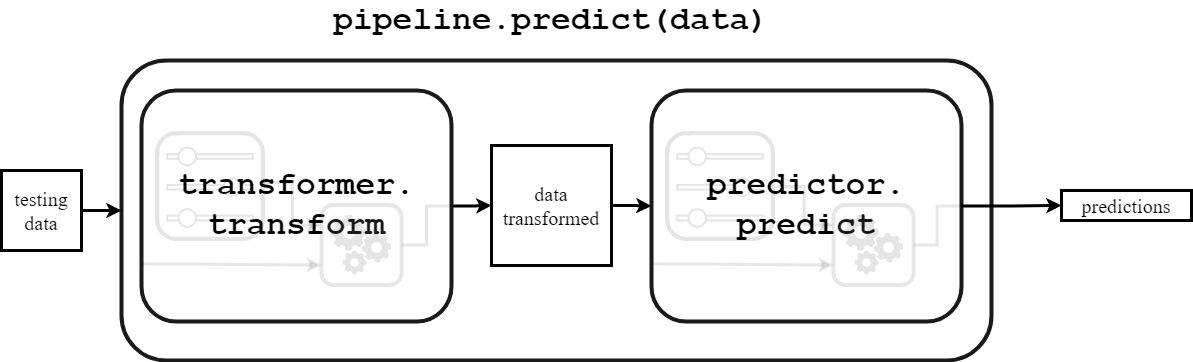

- El método `transform` de cada uno transformer está llamado para preprocesar los datos.
- Tener en cuenta que no es necesario llamar al método de ajuste para estos transformadores porque estamos utilizando los estados de modelo internos calculados al llamar a Model.fit.
- Los datos preprocesados ​​se proporcionan al predictor que generará el objetivo predicho llamando a su método `predict`.
- El método de puntuación es siempre *accuracy* para la clasificación y *r2* para la regresión. 

In [ ]:
# Podemos verificar la puntuación del pipeline predictivo completo llamando al método model.score.
model_name = model.__class__.__name__
score = model.score(data_test, target_test)
print(f"La precisión usando un {model_name} es {score:.3f} "
      f"con un tiempo de ajuste de {elapsed_time:.3f} segundos "
      f"en {model[-1].n_iter_[0]} iteraciones")

# Si necesitamos otras métricas podemos usar las funciones de scikit-learn.
from sklearn.metrics import classification_report
print("\nClassification Report:\n",
classification_report(target_test, predicted_target))

La precisión usando un Pipeline es 0.801 con un tiempo de ajuste de 0.055 segundos en 9 iteraciones

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.81      0.96      0.88      7442
        >50K       0.70      0.29      0.41      2327

    accuracy                           0.80      9769
   macro avg       0.76      0.62      0.64      9769
weighted avg       0.79      0.80      0.77      9769



In [ ]:
# Podemos comparar este modelo predictivo con el modelo predictivo que no escala las características.

model = LogisticRegression()
start = time.time()
model.fit(data_train, target_train)
elapsed_time = time.time() - start

In [ ]:
model_name = model.__class__.__name__
score = model.score(data_test, target_test)
print(f"La precisión usando un {model_name} es {score:.3f} "
      f"con un tiempo de ajuste de {elapsed_time:.3f} segundos "
      f"en {model.n_iter_[0]} iteraciones")

La precisión usando un LogisticRegression es 0.801 con un tiempo de ajuste de 0.037 segundos en 65 iteraciones


### Ejemplo Normalizer

In [ ]:
from sklearn.preprocessing import Normalizer

pipeline = make_pipeline(Normalizer(), LogisticRegression())
start = time.time()
pipeline.fit(data_train, target_train)
elapsed_time = time.time() - start

pipeline_name = pipeline.__class__.__name__
score = pipeline.score(data_test, target_test)
print(f"La precisión usando un {pipeline_name} es {score:.3f} "
      f"con un tiempo de ajuste de {elapsed_time:.3f} segundos "
      f"en {model.n_iter_[0]} iteraciones")

La precisión usando un Pipeline es 0.779 con un tiempo de ajuste de 0.037 segundos en 65 iteraciones


### Ejemplo Tx logaritmica

In [ ]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

def log_transform(X):
    return np.log1p(X)


pipeline = make_pipeline(FunctionTransformer(log_transform), LogisticRegression())
start = time.time()
pipeline.fit(data_train, target_train)
elapsed_time = time.time() - start

pipeline_name = pipeline.__class__.__name__
score = pipeline.score(data_test, target_test)
print(f"La precisión usando un {pipeline_name} es {score:.3f} "
      f"con un tiempo de ajuste de {elapsed_time:.3f} segundos "
      f"en {model.n_iter_[0]} iteraciones")

La precisión usando un Pipeline es 0.792 con un tiempo de ajuste de 0.054 segundos en 65 iteraciones


### Conclusiones
- Escalar los datos antes de entrenar la regresión logística fue beneficioso en términos de rendimiento computacional.
    - De hecho, el número de iteraciones disminuyó, así como el tiempo de entrenamiento.
    - El rendimiento de la generalización no cambió ya que ambos modelos convergieron.